In [1]:
import sympy as sy
from sympy import symbols, Function, dsolve, Derivative, Eq
sy.init_printing()
from sympy.abc import x,y,z
from sympy import pi

# Tarea 5d

https://docs.sympy.org/latest/modules/solvers/ode.html

Sobre los 'hints': https://docs.sympy.org/latest/modules/solvers/ode.html#sympy.solvers.ode.allhints

En todo este desarrollo usaremos $f(x)$ para designar a $y$, puesto que usar la función de sympy "Function" facilita mucho los cálculos.

## 1. Separable. $\frac{dy}{dx}=x+xy$

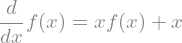

In [2]:
f=Function('f')
eq1=Eq(Derivative(f(x),x),x+x*f(x))
eq1

In [3]:
dsolve(eq1,f(x),hint='separable')

## 2. Exacta. $x \frac{dy}{dx}+3x+y$

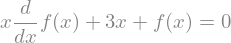

In [4]:
eq2=Eq(x*Derivative(f(x),x)+3*x+f(x),0)
eq2

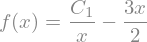

In [5]:
dsolve(eq2,f(x),hint='1st_exact')

## 3. $\frac{dy}{dx}+2xy=4x$

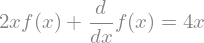

In [6]:
eq3=Eq(Derivative(f(x),x)+2*x*f(x),4*x)
eq3

In [7]:
dsolve(eq3,f(x))

## 4. Homogénea. $\frac{dy}{dx}=\frac{y}{x}+\tan(\frac{y}{x})$

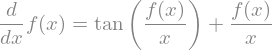

In [8]:
eq4=Eq(Derivative(f(x),x),(f(x)/x)+sy.tan(f(x)/x))
eq4

In [9]:
dsolve(eq4,f(x),hint='1st_homogeneous_coeff_best')

## 5. Bernoulli. $\frac{dy}{dx}+\frac{y}{x}=2x^3y^4$

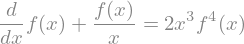

In [10]:
eq5=Eq(Derivative(f(x),x)+(f(x)/x),2*x**3*f(x)**4)
eq5

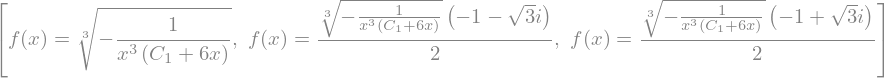

In [11]:
sol5=dsolve(eq5,f(x),hint='Bernoulli')
sol5

La solución real es:

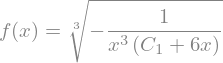

In [12]:
sol5[0]

Para $\{x>0,C_1<0\}$ o $x$ y $C_1$ con signos opuestos

## 6. Usando $y_p+y_c$.

In [19]:
eq61=Eq(Derivative(f(x),x,x)-2*(Derivative(f(x),x))+f(x),sy.exp(x))
eq62=Eq(x**2*Derivative(f(x),x,x)+x*Derivative(f(x),x)-4*f(x),0)

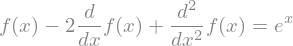

In [20]:
eq61

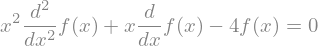

In [21]:
eq62

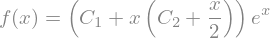

In [26]:
dsolve(eq61,f(x))

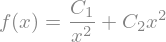

In [23]:
dsolve(eq62,f(x))

## 7. Con condiciones de frontera $y(0)=y(\pi/2)=0$

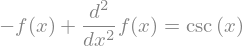

In [27]:
eq7=Eq(Derivative(f(x),x,x)-f(x),sy.csc(x))
eq7

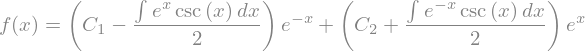

In [28]:
dsolve(eq7,f(x))

Y con las condiciones:

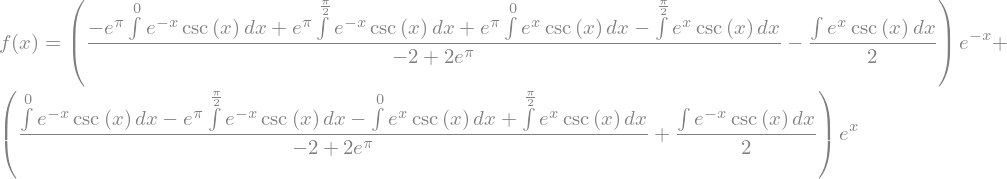

In [29]:
dsolve(eq7,f(x),ics={f(0):0,f(pi/2):0}).doit()

## 8. Resolver $x^2\frac{d^2y}{dx^2}+x\frac{dy}{dx}+\frac{2}{y^3}=0$

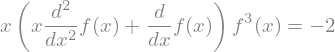

In [34]:
eq8=Eq(Derivative(f(x),x,x)*x**2*f(x)**3+x*Derivative(f(x),x)*f(x)**3,-2)
eq8.simplify()

In [35]:
dsolve((eq8.simplify()),f(x)).doit()

NotImplementedError: solve: Cannot solve x*(x*Derivative(f(x), (x, 2)) + Derivative(f(x), x))*f(x)**3 + 2

No logró resolver la ec. diferencial

## 9. Singularidad real y esencial

En ecuaciones diferenciales ordinarias, una singularidad 'real' es un punto donde la solución de la ecuación es mal comportada, pero puede removerse pues depende directamente de las condiciones iniciales/de frontera. Si la singularidad depende más bien de la ecuación(ecuaciones) y no puede "moverse" cambiando condiciones de frontera entonces se habla de una singularidad esencial.

En funciones valuadas en los complejos, la singularidad real es aquel punto donde una la solución a la función está indefinida. En el caso de singularidades removibles, basta redefinir la función para que ésta sea regular en una vecindad alrededor del punto.